## This notebook is a part of my Coursera Capstone project on Datascience and MachineLearning.

In [120]:
import pandas as pd
import numpy as np

In [121]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [122]:
df = pd.DataFrame(data[0])

In [123]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [124]:
df = df[df['Borough']!='Not assigned'].reset_index()

In [125]:
df.drop('index',axis=1,inplace=True)

In [126]:
df

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Not assigned
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


In [127]:
p = list(df['Postcode'].unique())
b = [df[df['Postcode']==i].reset_index()['Borough'][0] for i in p]
n = []
for i in p:
    s = ''
    for j in df[df['Postcode']==i]['Neighbourhood']:
        s+=j+','
    n.append(s)

In [128]:
df = pd.DataFrame(np.transpose(np.array([p,b,n])),[i for i in range(len(p))],['Postcode','Borough','Neighbourhood'])
df['Neighbourhood'] = df['Neighbourhood'].apply(lambda x:x[:-1])

In [129]:
for i in range(len(df)):
    if df['Neighbourhood'][i]=='Not assigned' :
        df['Neighbourhood'][i] = df['Borough'][i]

In [130]:
df

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge,Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens,Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson,Garden District"


## Explaination

#### The above data is created by first manipulationg the neighbourhood column by adding the string value of all the neighbourhoods of columns having same postcode and adding a comma at the end of each of the values to make it comma seperated
#### The borough column is created by taking only the first appearing value of the list of boroughs with same postcode
#### Later the ending commas of neighbourhood column was removed

#### Lastly, the columns with neighbourhood avlues not assigned were assigned the value of the corresponding boroughs

In [131]:
df.shape

(103, 3)

In [78]:
df2 = pd.read_csv('https://cocl.us/Geospatial_data')

In [79]:
df2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [80]:
lis = list(zip(df2['Postal Code'],df2['Latitude'],df2['Longitude']))

In [81]:
lon_lis = []
lat_lis=[]
for i in df['Postcode']:
    for j in lis:
        if j[0] == i:
            lat_lis.append(j[1])
            lon_lis.append(j[2])
            
df['Latitude'] = pd.Series(lat_lis)
df['Longitude'] = pd.Series(lon_lis)

In [82]:
df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens,Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937


In [83]:
print(set(df['Borough']))

{'Etobicoke', 'York', 'Mississauga', 'East York', 'North York', 'Central Toronto', "Queen's Park", 'Downtown Toronto', 'East Toronto', 'West Toronto', 'Scarborough'}


In [84]:
df2 = df[(df['Borough'] == 'West Toronto') | (df['Borough'] == 'East Toronto') | (df['Borough'] == 'Central Toronto') |(df['Borough'] == 'Downtown Toronto')]
df2.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [85]:
import seaborn as sns

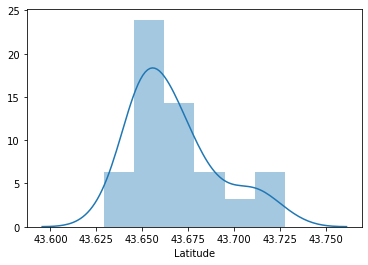

In [86]:
sns.distplot(df2['Latitude'].dropna())

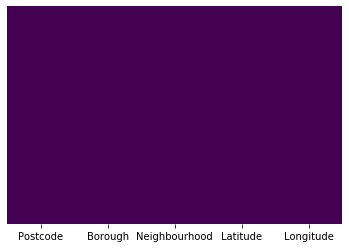

In [87]:
sns.heatmap(df2.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [88]:
df2['Latitude'].fillna(value=df2['Latitude'].mean(),inplace=True)

C:\Users\ms\Anaconda3\lib\site-packages\pandas\core\generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [89]:
df2['Longitude'].fillna(value=df2['Longitude'].mean(),inplace=True)

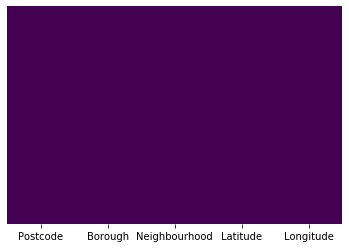

In [90]:
sns.heatmap(df2.isnull(),cmap='viridis',yticklabels=False,cbar=False)

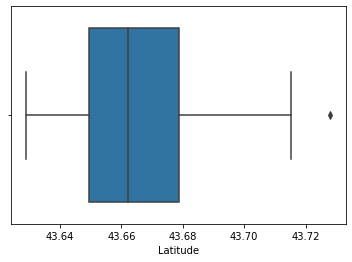

In [91]:
sns.boxplot(x='Latitude',data=df2)

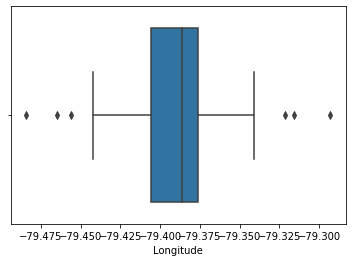

In [92]:
sns.boxplot(x='Longitude',data=df2)

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

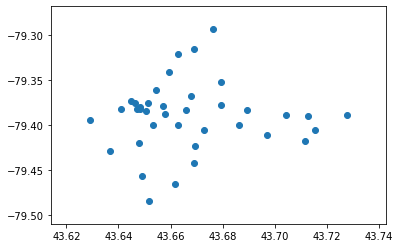

In [95]:
plt.scatter(df2['Latitude'],df2['Longitude'],cmap='rainbow')

In [96]:
df3 = df[(df['Borough'] == 'York') | (df['Borough'] == 'North York')]
df3.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
7,M3B,North York,Don Mills North,43.745906,-79.352188
10,M6B,North York,Glencairn,43.709577,-79.445073


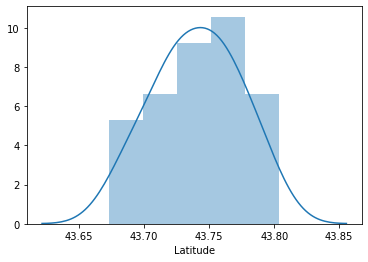

In [97]:
sns.distplot(df3['Latitude'].dropna())

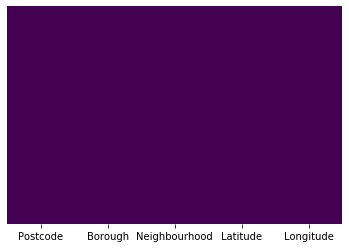

In [98]:
sns.heatmap(df3.isnull(),cmap='viridis',yticklabels=False,cbar=False)

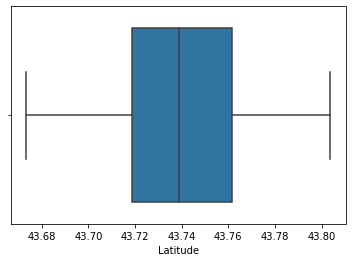

In [99]:
sns.boxplot(x='Latitude',data=df3)

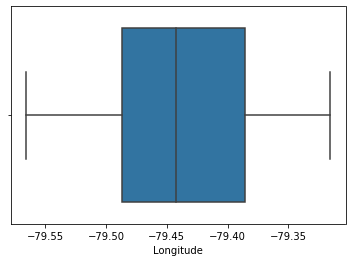

In [100]:
sns.boxplot(x='Longitude',data=df3)

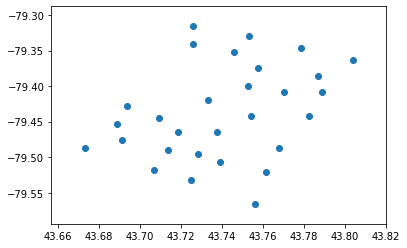

In [101]:
plt.scatter(df3['Latitude'],df3['Longitude'],cmap='rainbow')

In [102]:
df2['Longitude']

2     -79.360636
9     -79.378937
15    -79.375418
19    -79.293031
20    -79.373306
24    -79.387383
25    -79.422564
30    -79.384568
31    -79.442259
36    -79.381752
37    -79.419750
41    -79.352188
42    -79.381576
43    -79.428191
47    -79.315572
48    -79.379817
54    -79.340923
61    -79.388790
62    -79.416936
67    -79.390197
68    -79.411307
69    -79.464763
73    -79.405678
74    -79.405678
75    -79.456325
79    -79.388790
80    -79.400049
81    -79.484450
83    -79.383160
84    -79.400049
86    -79.400049
87    -79.394420
91    -79.377529
92    -79.374846
96    -79.367675
97    -79.382280
99    -79.383160
100   -79.321558
Name: Longitude, dtype: float64

In [103]:
data = np.array([df2['Latitude'],df2['Longitude']]).transpose()

In [104]:
data

array([[ 43.6542599, -79.3606359],
       [ 43.6571618, -79.3789371],
       [ 43.6514939, -79.3754179],
       [ 43.6763574, -79.2930312],
       [ 43.6447708, -79.3733064],
       [ 43.6579524, -79.3873826],
       [ 43.669542 , -79.4225637],
       [ 43.6505712, -79.3845675],
       [ 43.6690051, -79.4422593],
       [ 43.6408157, -79.3817523],
       [ 43.6479267, -79.4197497],
       [ 43.6795571, -79.352188 ],
       [ 43.6471768, -79.3815764],
       [ 43.6368472, -79.4281914],
       [ 43.6689985, -79.3155716],
       [ 43.6481985, -79.3798169],
       [ 43.6595255, -79.340923 ],
       [ 43.7280205, -79.3887901],
       [ 43.7116948, -79.4169356],
       [ 43.7127511, -79.3901975],
       [ 43.6969476, -79.4113072],
       [ 43.6616083, -79.4647633],
       [ 43.7153834, -79.4056784],
       [ 43.6727097, -79.4056784],
       [ 43.6489597, -79.456325 ],
       [ 43.7043244, -79.3887901],
       [ 43.6626956, -79.4000493],
       [ 43.6515706, -79.4844499],
       [ 43.6895743,

In [105]:
data.shape

(38, 2)

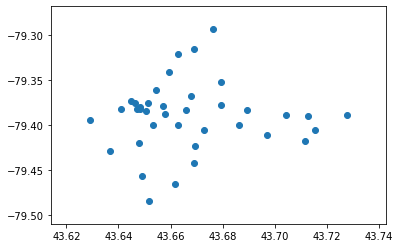

In [106]:
plt.scatter(data[:,0],data[:,1],cmap='rainbow')

In [107]:
from sklearn.cluster import KMeans

In [108]:
kmeans = KMeans(n_clusters=6)

In [109]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [110]:
kmeans.cluster_centers_

array([[ 43.65920614, -79.4236885 ],
       [ 43.66817442, -79.35979032],
       [ 43.65026524, -79.38411155],
       [ 43.70563855, -79.39811351],
       [ 43.6540462 , -79.46851273],
       [ 43.6693666 , -79.3100536 ]])

In [111]:
kmeans.labels_

array([1, 2, 2, 5, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 5, 2, 1, 3, 3, 3, 3, 4,
       3, 0, 4, 3, 2, 4, 3, 2, 3, 2, 1, 2, 1, 2, 2, 5])

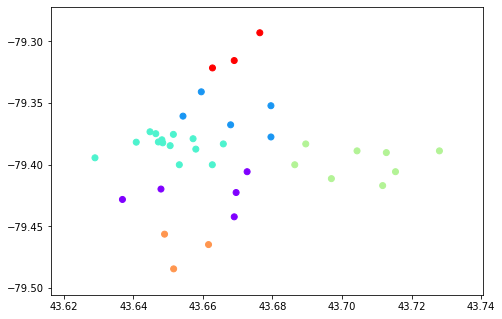

In [112]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.scatter(df2['Latitude'],df2['Longitude'],c=kmeans.labels_,cmap='rainbow')